# 第五讲 写作文本中的语篇结构分析
本课目标：
- 介绍写作评估中的语篇结构评价方法，着重讨论议论语步的概念和标注方法
- 学习使用NLP技术进行多标签文本分类
    - 了解BERT模型的基本概念和工作原理
    - 使用BERT模型进行议论语步分类任务


# 1. 研究背景
在第三章和第四章中，我们分别介绍了如何使用一系列自动化分析工具来生成写作文本中词汇以及句法层面的指标，从而分析文本的词汇复杂度以及句法复杂度。在本章，我们将进一步探讨写作文本在语篇层面的特征，以及如何使用自动化的分析工具来进行分析。  
## 1.1 议论文写作中的语篇特征
### 1.1.1 议论文写作的论证语步
大多数以往的写作研究主要集中于探讨词汇和句法复杂度等形式特征的发展，而对写作内容和结构特征的关注相对较少（Bulté & Housen, 2012；Crossley & McNamara, 2012；Norris & Ortega, 2009；Tardy & Swales, 2007）。而这些结构特征在议论文写作中更为常见，且反映了写作者的认知能力和语言水平（O’Keefe, 1999；J. Qin & Karabacak, 2010；Stapleton & Wu, 2015）。在议论文写作中，写作者通常需要运用不同的结构成分，即议论文中的论证语步(argumentative moves)，将观点和证据组织成连贯的文本。这些论证语步表明写作者在不同论述阶段有意识地选择如何呈现和构建论点，论述过程从对立和开篇到论证和结论（van Eemeren, 2019）。  
先前的研究者大多将议论文的结构划分为三个部分：陈述个人观点；使用证据支持自己的主张；回应（包括提及和反驳）不同的观点（J. Qin & Karabacak, 2010；Simon, 2008；Toulmin, 2003）。相关研究发现，高质量的议论文通常包含更多样化的论证语步，并特别关注回应不同的观点或提出反驳论点（Crammond, 1998；Nussbaum & Kardash, 2005；J. Qin & Karabacak, 2010；Stapleton & Wu, 2015；Varghese & Abraham, 1998）。  
Toulmin（1958, 2003）提出了论证模型。他认为，良好的论证应包含 _claim_、_data_、_warrant_、_backing_、_qualifier_ 和 _rebuttal_ 六个论证语步。在该模型中：  
- _Claim_ 是对观点或结论的明确表达；  
- _Data_ 则用来支持论点。  
- _Warrant_ 指的是作者如何将论点与论据相联系，  
- _Backing_ 为 _warrant_ 提供支持。  
- _Qualifier_ 则界定了论点的范围，  
- _Rebuttal_ 则出现在作者为论证提出例外情况的地方。  

围绕该论证语步模型以及其多种改编形式，学界已有一系列相关研究，旨在评估母语（L1）和二语（L2）语境中的议论文写作质量（Crammond, 1998; Nussbaum & Kardash, 2005; J. Qin & Karabacak, 2010; Stapleton & Wu, 2015; Varghese & Abraham, 1998）。  
### 1.1.2 论证语步自动分析
尽管与Toulmin框架相关的研究强调在论证中应考虑对立观点的重要性，研究者们在对论证语步进行分类时却遇到了诸多困难。由于论证通常较为复杂，并且不同堵读者对于论证内容的理解也可能存在不同，论证语步的分类准确性可能存在问题（Sampson & Clark, 2008; Simon, 2008; Stapleton & Wu, 2015）。人工对这些步骤进行编码不仅在保持一致性方面需要耗费大量时间，而且后续的个人编码过程也十分耗时。目前论证语步的相关研究大多还停留在手动编码，依靠质性分析。因此，该研究领域对论证步骤的自动识别需求日益增长（Stab & Gurevych, 2017）。
Transformer模型(例如GPT，BERT等)问世后，展现出了对于自然语言理解的强大能力。基于此，我们基于BERT模型，在人工标注数据的基础上训练了一个论证语步分类器(Qin et al., under review)。该工具将一篇议论文分为六种论证步骤，即 _claim_, _data_, _counter-argument claim_, _counter-argument data_, _rebuttal claim_, _rebuttal data_。我们使用预训练语言模型BERT来辅助识别论证语步的边界并对其类型进行分类。在有监督学习和人工指导的模型微调下，我们实现了较高的分类准确度（F1值为0.83）。  
## 1.2 自然语言处理基础知识：词嵌入&预训练语言模型
在进一步我们之前设计的自动化论证语步分析工具之前，我们首先需要了解一下自然语言处理的基础知识。
### 1.2.1 分布式语义表示-基于上下文信息的词嵌入
如何让机器“理解”语言是自然语言处理研究最重要的问题之一。因为机器无法像人类一样直接理解自然语言，所以我们需要将自然语言转化为机器能够理解的形式。因此，科学家将单词表示为一串数字，形成一个多维数字向量，即词向量(word vector)。科学家一开始使用指称语义(denotational semantics)来进行语义表示，即根据单词的近义词(synonym)和上位词(hypernym)来确定词义，例如WordNet。在指称语义表示中，词向量通常为独热向量(one-hot vector)，即向量维度数为词表大小，且向量中只有一个维度为1，其余维度为0。这样的表示方法会使独热向量维度随着词表扩大，存储效率不高，且词与词之间相互孤立，不存在词汇间关系，即无法表征语义信息。  
John Rupert Firth于1957年提出了分布式语义(distributed representation)假设：词的含义可由其上下文的分布进行表示，即词嵌入(word embedding)。与独热向量不同，分布式表示使用特定维度的低维实数向量-词嵌入-来表示单词，是一种稠密的表示方式。词嵌入最大的好处在于将语义信息融合进去，这使得基于衡量向量距离的方法（如欧式距离、余弦距离等）可以用来度量单词间的相似度。直观上来说，就是语义上相近或相似的词，在向量空间上的距离会更接近，而语义相反的词距离会更远。例如，都表示城市的“上海”和“北京”在词嵌入空间中会非常接近。  
但单个词嵌入很难解决自然语言中经常出现的一词多义现象。例如在金融类文本中，“bank”更有可能被理解为“银行”而不是“河岸”。除此之外，同一个词在不同上下文中的含义也会有或多或少的差别。基于此，科学家使用神经网络模型，将一系列词作为输入，形成词嵌入序列，这就允许词嵌入之间相互交互，以捕捉上下文信息，从而得到包含上下文信息的词嵌入(contextualized word embedding)。
### 1.2.2 预训练语言模型-GPT & BERT
传统的机器学习任务通常是针对不同的任务训练不同的模型，但这样耗时又耗力。于是科学家提出了预训练模型：即在一个通用语料库上训练一个模型，然后针对不同的任务微调该模型。预训练模型可以显著减少训练时间，提高模型泛化能力。这个通用语料库通常非常庞大，例如维基百科，谷歌图书等。经过预训练，我们就可以得到一个对语言有基本理解的基线模型。它可以利用预训练语料库中的语言知识，为文本生成高质量且通用的词嵌入。目前常用的预训练模型主要分两种：自回归(auto regressive)模型和自编码(auto encoding)模型。自回归模型的目标可以简单理解为根据上文内容预测对下一个词进行预测，可以类比为**文字接龙**。GPT就是典型的自回归模型，这一类模型更擅长生成任务。而自编码模型则是将输入的句子中的部分单词随机掩盖，然后让模型根据上下文单词来预测这些被掩盖的单词，可以类比为**完形填空**。BERT就是典型的自编码语言模型，这一类模型更擅长分类任务。
BERT全称是基于Transformer的双向编码器表示(Bidirectional Encoder Representations from Transformers)。它本质上是一种掩码语言模型(maksed language model)，通过随机将输入文本中的一些词"遮盖起来"，替换为[MASK] token，基于上下文来对这些token进行预测。这与我们的论证语步分类目标相契合：我们正是希望模型能够根据上下文在每个语步之后插入其所述的语步标签，从而完成分类任务。
# 2. 构建基于BERT模型的论证语步分类工具
有了上述自然语言处理的基础知识，我们再回看本研究的目标：自动化语步分类，就会发现自编码语言模型与我们的需求相契合：分类任务。因此，我们选用了BERT来完成该工具的训练。具体来说，该工具主要完成两个任务：论证语步边界切分以及论证语步分类。为了方便大家更详细的了解我们的分类模型训练全过程，这里采用Eguchi和Kyle在2024年提出的训练一个自然语言处理工具的流程进行演示。
## 2.1 工具目标及适用人群
在开发/设计一个工具之前，首先需要明确：  
- 这个工具的目标受众是谁？教师，学生，还是研究者？
- 要自动化分析的目标语言特征是什么？词汇，句法，还是篇章？
- 分析内容是什么？是母语学习者的语言产出还是二语学习者的语言产出？
- 分析工具的输出是什么？指标得分，还是文字反馈？  
基于本章的研究主题，我们希望可以开发一个自动分析议论文论证语步的分析工具，来分析EFL学习者的议论文论证结构。该工具可以用于课堂教学，课后写作反馈，学生写作自我评估等场景中。
## 2.2 任务设计
确定目标之后，需要接下来确定对应的自然语言处理任务是什么，并且搜索是否存在现成的数据集以及标注方案，或考虑自建数据库/标注方案。对应到本研究中，我们的任务是对议论文写作中的语步进行切分和分类。结合我们已有的纵向学习者语料库的数据特点，我们基于上文提到的Toulmin论证结构框架，设计了论证语步标注方案，其中包括八个成分：_title_, _claim_, _data_, _counter-argument claim_, _counter-argument data_, _rebuttal claim_, _rebuttal data_, _non-argument_。以下是每个标签所代表的论证语步的具体含义：
- _Title_ 表示文章标题 
- _Claim_: 作者对写作话题的明确表态，即论点。
- _Data_: 作者用来支持论点的证据，可以包括逻辑论证或数据。
- _Counter-argument claim_ & _Counter-argument data_ ：作者对反方观点的提及，或承认自己观点的弱点。
- _Rebuttal claim_ & _Rebuttal data_：作者对反方观点的回应，或反驳反方观点的弱点。
- _Non-argument_ 表示与论证内容无关的语句。
## 2.3 试标注
在这个阶段，我们可以先试着根据制定好的标注方案，对语料库中的语料进行标注。并且确定标注数据的格式可以用于后续的模型训练。在本研究中，我们决定直接在原txt文本中进行标注，在相应语步后添加语步标签，使用方括号[]加以间隔。本研究使用的语料来源于一个纵向EFL学习者语料库，其中包括了235名高中英语学习者在1.5学年之间完成的1409篇议论文写作，平均长度在150-300词之间，写作话题为社会/科学热点话题。
## 2.4 标注员训练
在进行正式的语料标注之前，对参与项目的标注员进行一致性培训是十分重要的，这样才能保证所有的训练语料都按照相同的标准进行语步切分以及分类。在这个阶段，我们招募了8名标注员，进行了两轮人人一致性训练。在第一轮训练中，我们和标注员详细介绍标注方案，然后选取20篇议论文一起进行语步标注，完成之后一起讨论出现的问题和疑惑，在达成一致之后，在进行第二轮训练。第二轮训练结束之后，我们计算人人标注一致性(inter-annotator agreement)为0.99，表明标注员对标注方案理解一致。
## 2.5 正式标注
完成标注员一致性训练之后，标注员分批对语料进行标注，并且在标注期间定期开会解决分歧并完善标注方案。通过定期核查标注数据来保证一致性。
## 2.6 数据准备
在这个阶段，我们对标注数据进行预处理，将其转换为机器学习的必要格式(例如txt, csv等)，并将其分为训练、开发和测试集。除此之外，对于数据中出现较少的标签，也可以通过过采样技术来解决标签不平衡问题。在本研究中，我们将经过人工语步标注的1170篇语料分为训练集(80%：936篇)和验证集(20%：234篇)。
## 2.7 模型训练
在这个阶段，可以先尝试使用较为简单的模型结构来获得基准结果，然后再尝试更复杂的结构和参数调整以提高表现。模型架构如下图所示：模型主要包括两部分：基于规则的语步边界识别以及基于BERT的语步分类。语步之间的[SEP] token就是模型需要根据上下文信息预测的语步标签。  
![model architechture.png](<attachment:model architechture.png>)
## 2.8 模型评估
在这个阶段，可以使用适当的模型评价标准（如准确率、召回率、F1分数和Cohen’s kappa）来评估训练模型表现。也可以交叉验证几种指标以评估模型在不同数据分割上的稳定性。在本研究中，我们使用F1分数来评估模型的的表现；该指标可以简单理解为模型分类任务的准确性。第一轮训练之后，我们模型的总F1分数为0.74，说明总体分类表现较好。
## 2.9 模型验证
在这个阶段可以使用训练好的模型对新的数据进行预测，以验证模型的能力。我们使用模型对语料中剩下的239篇未标注文本进行自动化语步分类，并使用模型标注后的文本进行语言学分析，来看模型自动标注的论证语步是否能够准确预测学习者的写作发展。结果显示，随着时间推移，学习者可以在写作中更加注重对反方观点的提及以及回应，并且减少与论证无关内容的出现 (Qin et al., under review)。下面这段代码可以演示如何调用训练好的论证语步分类器对文本进行论证语步自动分类。
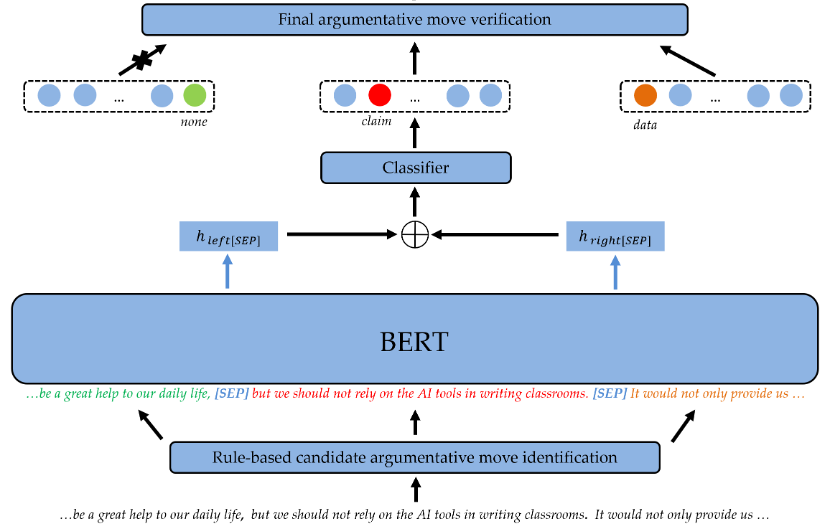

In [ ]:
# using huggingface-cli to download the model and tokenizer
# install the huggingface-cli
%pip install -U "huggingface_hub[cli]"
# download roberta-large model
%huggingface-cli download FacebookAI/roberta-large --local-dir ./roberta_large --local-dir-use-symlinks False

In [ ]:
from transformers import RobertaTokenizerFast
import torch
from torch.utils.data import DataLoader
from preprocess_data import read_files, CustomDataset
from model_roberta import RoBERTaClass
import os
import warnings

warnings.filterwarnings("ignore")  # ignore warnings

MODEL_NAME_OR_PATH = "./roberta_large" # the path to the model configuration file and tokenizer
CKPT_PATH = "./checkpoint.pt" # the path to the model checkpoint file
FILE_DIR_PATH = "./test_data" # the path to the test data directory
OUT_DIR_PATH = "./results" # the path to the output directory


@torch.no_grad() # disable gradient calculation
def predict():
    text_list, _, label_encoder, file_path_list, original_text_list = (
        read_files(dir_path=FILE_DIR_PATH, is_test=True)
    ) # read files from the test data directory
    device = "cuda:0" if torch.cuda.is_available() else "cpu" # use GPU if available
    checkpoint = torch.load(CKPT_PATH, map_location="cpu") # load the model checkpoint
    model_checkpoint = {
        k.replace("module.", "", 1): v
        for k, v in checkpoint["model_state_dict"].items()
    } # convert the model checkpoint to the correct format, remove the "module." prefix if it exists
    label_encoder.classes_ = checkpoint["classes"] # load the label encoder
    model = RoBERTaClass(MODEL_NAME_OR_PATH, len(label_encoder.classes_)) # initialize the model
    model.load_state_dict(model_checkpoint) # load the model checkpoint
    model.eval() # set the model to evaluation mode
    model.to(device) # move the model to the correct device
    tokenizer = RobertaTokenizerFast.from_pretrained(
        MODEL_NAME_OR_PATH
    )  # initialize the tokenizer
    for text, file_path, original_text in zip(
        text_list, file_path_list, original_text_list
    ):
        print(f"Processing {file_path}") # print the file path
        test_set = CustomDataset(text, [], tokenizer, is_test=True) # initialize the test dataset
        test_loader = DataLoader(test_set, batch_size=5, shuffle=False) # initialize the test loader
        all_preds = [] # initialize the list to store the predicted labels

        for i, data in enumerate(test_loader):
            ids = data["ids"].to(device, dtype=torch.long) # move the ids to the correct device
            mask = data["mask"].to(device, dtype=torch.long) # move the mask to the correct device
            special_tokens_mask = data["special_tokens_mask"].to(
                device, dtype=torch.long
            ) # move the special tokens mask to the correct device
            outputs = model(ids, mask, special_tokens_mask) # get the model outputs
            preds = torch.argmax(outputs, dim=1) # get the predicted labels
            all_preds.extend(preds.cpu().detach().numpy().tolist()) # store the predicted labels

        all_preds_str = [label_encoder.classes_[pred] for pred in all_preds] # convert the predicted labels to strings
        new_file_path = file_path.replace(".txt", "_pred.txt").replace(
            FILE_DIR_PATH, OUT_DIR_PATH
        ) # generate the output file path
        os.makedirs(os.path.dirname(new_file_path), exist_ok=True) # create the output directory if it does not exist

        with open(new_file_path, "w", encoding="utf-8") as f: # open the output file
            for i in range(len(original_text)):
                if all_preds_str[i] == "[none]": # if the predicted label is [none], write the original text
                    f.write(original_text[i])
                elif original_text[i][-1] == "\n": # if the original text ends with a newline character, write the original text without the newline character and the predicted label
                    f.write(original_text[i][:-1] + all_preds_str[i] + "\n")
                else: # otherwise, write the original text and the predicted label
                    f.write(original_text[i] + all_preds_str[i] + " ")

    # show the maximum GPU memory usage in GB
    print(torch.cuda.max_memory_allocated() / 1024 / 1024 / 1024, "GB")


predict()




## 2.10 基于人类反馈的模型微调
尽管当前模型的表现已经好于前人相关研究中的结果，但由于我们使用的数据有一定的同质性，为了提高模型在标注更多样化数据时的泛化能力，我们进行了基于人类反馈的模型微调。具体过程如下：
- 我们选取来自亚洲学习者语料库ICNALE中的1100篇议论文写作作为新的微调数据集
- 使用模型对这1100篇数据进行自动化语步标注
- 将模型标注结果返回给原来的8位标注员，让他们对标注结果进行有标记的修正
- 将修正后的数据用于模型再次训练  
这一过程一方面有助于提升模型在稀疏标签的上的标注能力，另一方面，基于人类反馈的修正数据有助于模型“有的放矢”地提升分类表现(Ouyang et al., 2022)。经过这一微调过程后，模型在各个标签的F1得分上都有所提升，并且总的F1分数提高到了0.83。
## 2.11 模型部署
完成以上步骤后，可以考虑将模型，评估标注，以及使用手册以线上资源库或者学术文献的方式发布，以供其他研究者使用。也可以考虑开发Web应用程序或用户友好的界面，以便非技术人员也能方便地使用该工具。结合本研究，可以考虑结合前序章节介绍的词汇，句法层面的自动化分析工具，将其整合成为一个可以自动化分析不同语言层面的自动化写作批改工具，供教师、学生、以及研究者使用。
